# The Central Limit Theorem
The Central Limit Theorem (CLT) is one the fundamental and most profound concepts in the field of Statistics. In this Notebook we will take a closer look at the CLT and its implications. 

In essence, the CTL tells us that if we have any kind of probability distribution and we independently draw values $x_{i}$ from it to generate $N$ samples $[x_{1}, ..., x_{n}]$, the distribution of the sample mean $S_{k}$

\begin{equation}
S_{k}=\frac{x_{1} + \dots + x_{n}}{n}
\end{equation}

will tend towards a normal (Gaussian) distribution as $n$ grows larger, no matter the shape of the distribution we are drawing our samples from.

To illustrate how powerful this theorem is we will look at a very simple example: the rolling of a dice

## Rolling dices
When we roll a fair dice all outcomes are equally likely; the chances of getting a 1 are the same of getting a 6. Therefore, the rolling of a dice is perfectly described by what we call a Uniform Distribution $\mathcal{U}(a, b)$.

We can easily check that there is nothing "Gaussian" in the rolling of a dice by rolling a dice many times and reporting the outcome

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
N_rolls = 1000
rolls = [np.random.randint(low=1, high=7, size=1)[0] for _ in range(N_rolls)]
print('First 10 rolls of a dice')
print(rolls[:10])

First 10 rolls of a dice
[1, 5, 3, 4, 1, 4, 2, 2, 3, 5]


If we tak a look at the histogram of roll it clearly follows a Uniform distribution, with all dice values appearing approximately the same amount of times


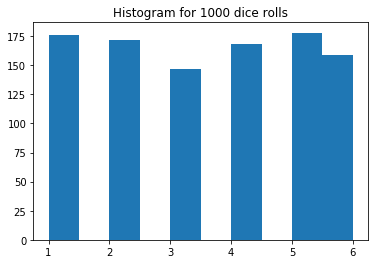

In [3]:
plt.hist(rolls, align='mid')
plt.title('Histogram for %d dice rolls' %N_rolls)
plt.show()

## Here comes the CLT...
Now let's roll $n$ dices to create a sample $S=[x_{1}, \dots, x_{n}]$ and define the score $s=\frac{1}{n}\sum_{i}^{n} x_{i}$ as the mean of all the values in our sample.

In other words, if we roll 3 dices and get [1, 4, 5] our score is 10/3 = 3.33

We will repeat that procedure many times and register the score for each sample

In [4]:
def roll_dices(N_dices):
    """ Rolls N_dices once and returns the score """
    rolls = [np.random.randint(low=1, high=7, size=1)[0] for _ in range(N_dices)]
    score = sum(rolls)/N_dices
    return score

def roll(N_dices, N_trials):
    """ Repeats roll_dices(N_dices) several times: N_trials """
    trials = ['Roll #%d' %i for i in range(N_trials)]
    scores = [roll_dices(N_dices) for _ in range(N_trials)]
    return scores, trials

In [60]:
N_dices = 3        # We roll N_dices each round
N_trials = 1000   # We run the experiment for N_trials rounds

scores, trials = roll(N_dices, N_trials)

series_scores = pd.Series(data=scores, index=trials)
df = pd.DataFrame(series_scores, columns=['Score']).T
print('Score results of rolling %d dices %d times' %(N_dices, N_trials))
df.head()


Score results of rolling 3 dices 1000 times


,Roll #0,Roll #1,Roll #2,Roll #3,Roll #4,Roll #5,Roll #6,Roll #7,Roll #8,Roll #9,...,Roll #990,Roll #991,Roll #992,Roll #993,Roll #994,Roll #995,Roll #996,Roll #997,Roll #998,Roll #999
Score,4.0,3.0,5.333333,2.666667,2.666667,1.666667,5.0,2.666667,2.333333,3.333333,...,3.666667,4.0,3.666667,2.666667,3.0,2.333333,5.0,2.666667,2.666667,5.666667


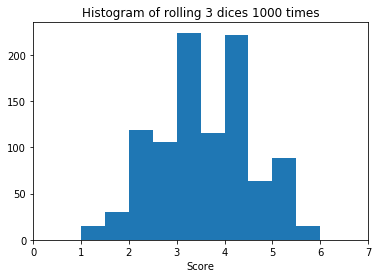

In [61]:
plt.hist(scores)
plt.xlabel('Score')
plt.xlim([0, 7])
plt.title('Histogram of rolling %d dices %d times' %(N_dices, N_trials))
plt.show()

If we plot the histogram we can see that it resembles a Gaussian distribution. At this point we might think that this is a result of the CLT. However, the truth is that if we run a "normality test" on the scores (a test which tells us whether or not a sample comes from a Normal distribution) we will see that in this case it does not pass the test.

In [62]:
import scipy.stats as st

def test_if_normal(data):
    alpha = 0.05
    k2, p = st.mstats.normaltest(data)
    print('p = ', p)

    if p > alpha:
        print('\nThe Null hypothesis is ACCEPTED')
        print('Sample comes from a Normal distribution')
    if p < alpha:
        print('\nThe Null hypothesis is REJECTED!')
        print('Sample does NOT come from a Normal distribution')
    return

test_if_normal(scores)

p =  1.59482886552e-06

The Null hypothesis is REJECTED!
Sample does NOT come from a Normal distribution


## Wait... What's going on?
So we ran the experiment for a total of $N=1000$ times... Surely by virtue of the CLT the result must be Gaussian.

The trick here is that the CLT tells us the distribution of the sample mean $S_k$ will approach a Normal Distribution when the sample size $n$ grows sufficiently large, not when we draw many $N$ samples.

It is the $\textbf{Sample Size}$ $n$ that matters, not the $\textbf{Number of Samples}$ $N$!

So let's try again with the same number of samples $N$ but with larger sample size $n$ (we roll more dices each round)

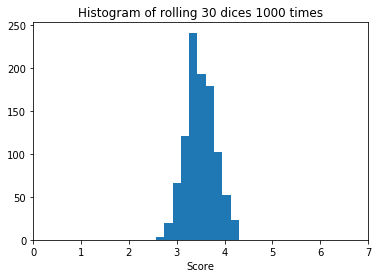

p =  0.09492332805

The Null hypothesis is ACCEPTED
Sample comes from a Normal distribution


In [63]:
N_dices = 30        # We roll N_dices each round
N_trials = 1000   # We run the experiment for N_trials rounds

scores, trials = roll(N_dices, N_trials)

plt.hist(scores)
plt.xlabel('Score')
plt.title('Histogram of rolling %d dices %d times' %(N_dices, N_trials))
plt.xlim([0, 7])
plt.show()

test_if_normal(scores)

We can see that the histogram looks very similar to a Normal distribution, and the normality test confirms our hypothesis. Now we finally understand the subtlety of the Central Limit Theorem

## Bringing the Central Limit Theorem to its Limit
We have shown the CLT works when applied to the rolling of dices which follow a Uniform Distribution. But does it really apply to all kinds of probability distributions? Maybe there is a secret distribution which refuses to follow the rule of the CLT...

To show that this is not the case, we can select a series of probability distributions (I have chosen them from numpy.random because they do not require arguments apart from the $\textbf{sample size}$). For each of them, we draw samples and compute the score just like before. Finally, we run a normality test

Bear in mind that normality tests are not infallible and can sometimes reject the hypothesis even if it is true. If you see a rejection, re-run the cells a couple of times.

In [9]:
r = np.random
list_distributions = [r.laplace, r.logistic,
                      r.standard_exponential, r.uniform, r.exponential]

def crazy_dist(sample_size, N_trials):
    """ 
    Test whether the CLT holds for a list of different 
    probability distributions 
    """
    for dist in list_distributions:
        print('\nDistribution:')
        print(dist)
        scores = []
        for i in range(N_trials):
            sample = dist(size=sample_size)
            score = sum(sample)/sample_size
            scores.append(score)
        test_if_normal(scores)
        print('___________________________')
    return 

In [10]:
crazy_dist(sample_size=50, N_trials=100)


Distribution:
<built-in method laplace of mtrand.RandomState object at 0x7f094c065bd0>
p =  0.664407148613

The Null hypothesis is ACCEPTED
Sample comes from a Normal distribution
___________________________

Distribution:
<built-in method logistic of mtrand.RandomState object at 0x7f094c065bd0>
p =  0.903094854438

The Null hypothesis is ACCEPTED
Sample comes from a Normal distribution
___________________________

Distribution:
<built-in method standard_exponential of mtrand.RandomState object at 0x7f094c065bd0>
p =  0.68095836034

The Null hypothesis is ACCEPTED
Sample comes from a Normal distribution
___________________________

Distribution:
<built-in method uniform of mtrand.RandomState object at 0x7f094c065bd0>
p =  0.896730309271

The Null hypothesis is ACCEPTED
Sample comes from a Normal distribution
___________________________

Distribution:
<built-in method exponential of mtrand.RandomState object at 0x7f094c065bd0>
p =  0.0695745821351

The Null hypothesis is ACCEPTED
Sampl

## CLT and the Poisson distribution

Let's now look at another example of the CLT. Imagine that every morning you commute to work. This is your daily routine: you take the 8:00 train at your local station which arrives at the Central Station at 8:30. But your commute train from Central Station to your workplace leaves at 8:50. Something similar happens on your way home in the evening. This means that twice a day you have 20 min to spare, so you decide to dedicate those extra minutes to proof the Central Limit Theorem (because yes, you are a geek).  

While you wait for the train to arrive, you decide to count the buses passing by. According to the schedule, 4 buses are expected to pass by in those 20 min. It's hard to know the probability distribution of the buses because it surely depends on several factors (the level of traffic that day, the weather, unexpected delays caused by a mechanic problem...).

So you come up with the following plan:

(1) Every day, both in the morning and in the evening you count how many buses pass in front of you in those 20 min.

(2) You take the average number of buses on a bi-weekly basis. This means you are averaging 2 weeks worth of data (2 measurement per day, 5 days per week, 2 weeks) which corresponds to 20 measurements ($\textbf{sample size}$ of 20). 

(3) After several months you analyse the results to see if the CLT stands

### Example of your data
Let's check an example of the sort of data you will record in a week. We will assume that the buses follow a Poisson distribution:

For events with an expected separation $\lambda$ the Poisson distribution f($k$; $\lambda$) describes the probability of $k$ events occurring within the observed interval $\lambda$

In this case $\lambda$ is the expected number of buses to pass by in our 20 min window, and the probability of observing $k$ buses in that interval is given by the Poisson distribution.

In [45]:
n_buses = 4
n_times = 2
n_days = 5
buses_example = np.random.poisson(lam=n_buses, size=(n_times, n_days))
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
times = ['morning', 'evening']

for j in range(n_days):
    
    for i in range(n_times):
        day, time = days[j], times[i]
        bus = buses_example[i,j]
        print('On ' + day + ' ' + time + ' you see %d buses' %bus)
    print('__________________________________')

On Monday morning you see 5 buses
On Monday evening you see 4 buses
__________________________________
On Tuesday morning you see 7 buses
On Tuesday evening you see 6 buses
__________________________________
On Wednesday morning you see 4 buses
On Wednesday evening you see 6 buses
__________________________________
On Thursday morning you see 4 buses
On Thursday evening you see 2 buses
__________________________________
On Friday morning you see 7 buses
On Friday evening you see 3 buses
__________________________________


So let us generalize our data to 12 months worth of observations, run our analysis plan and see how things look like.

Judging by the histogram, the distribution of the averages does not look very Gaussian. That is because we only have 24 averages, but if we run a normality test it tells us with high confidence that the averages follow a gaussian distribution.

You can try and run the cell below but with 1000 months worth of observations and you will se that the histogram becomes a Gaussian centered around the average of 4 buses (our initial assumption)

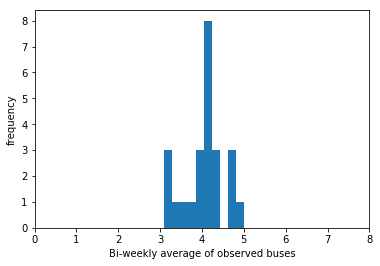

p =  0.675612897712

The Null hypothesis is ACCEPTED
Sample comes from a Normal distribution


In [57]:
n_samples = 12 * 2     # 12 months * 2 sets of biweekly data per month
averages = []
for i in range(n_samples):
    # Create a 2-week data set
    buses = np.random.poisson(lam=n_buses, size=n_times*n_days)
    # Compute the average of bus counts
    average = np.mean(buses)
    # Record the result of that 2-week analysis
    averages.append(average)
    
# Plot the Histogram
plt.hist(averages)
plt.xlabel('Bi-weekly average of observed buses')
plt.ylabel('frequency')
plt.xlim([0, 2*n_buses])
plt.show()

# Check for normality
test_if_normal(averages)